In [1]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv('weather.csv')

In [85]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,No


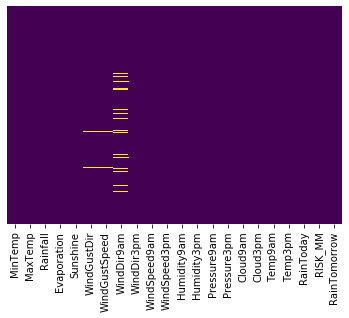

In [72]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
media_sunshine = df['Sunshine'].mean()

In [68]:
df['Sunshine'].fillna(media_sunshine,inplace=True)

In [70]:
media_vel_vent_9am = df['WindSpeed9am'].mean()

In [71]:
df['WindSpeed9am'].fillna(media_vel_vent_9am,inplace=True)

In [83]:
df['RainToday'].replace('Yes',1,inplace=True)

In [84]:
df['RainToday'].replace('No',0,inplace=True)

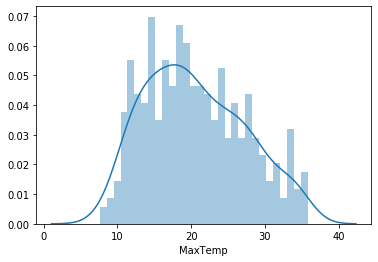

In [86]:
sns.distplot(df['MaxTemp'],bins=30)

In [110]:
X = df[['MinTemp','MaxTemp','Rainfall','Sunshine','Humidity3pm','Pressure3pm','Cloud3pm']]

In [111]:
y = df['Evaporation']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
lm.coef_

array([ 0.23050684,  0.03445953, -0.03616952,  0.07188996, -0.03615514,
       -0.03168169,  0.01672694])

In [118]:
lm.intercept_

35.365133973511114

In [119]:
predict = lm.predict(X_test)

Text(0, 0.5, 'valores previstos')

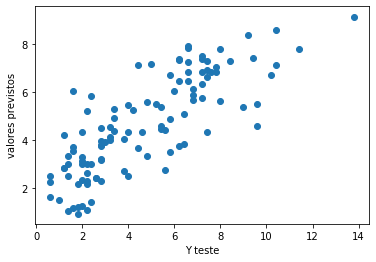

In [120]:
plt.scatter(y_test,predict)
plt.xlabel('Y teste')
plt.ylabel('valores previstos')